# Random ploting beam displacement

In [ ]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
a = np.where(particle_type==1)[0]
idx = np.random.choice(a, 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_pos[:, idx[fig_id], 2], 'b')
    ax.plot(pred_pos[:, idx[fig_id], 2], 'r--')

# Random ploting velocity

In [ ]:
pred_vel = pred_pos[1:, :, :] - pred_pos[:-1, :, :]
gt_vel = gt_pos[1:, :, :] - gt_pos[:-1, :, :]

fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    ax.set_title(f'init xyz-{gt_pos[0, idx[fig_id]]}')
    ax.plot(gt_vel[:, idx[fig_id], 2], 'b')
    ax.plot(pred_vel[:, idx[fig_id], 2], 'r--')

# Random ploting acc

In [ ]:
pred_acc = pred_vel[1:, :, :] - pred_vel[:-1, :, :]
gt_acc = gt_vel[1:, :, :] - gt_vel[:-1, :, :]

fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    ax.set_title(f'init xyz-{gt_pos[0, idx[fig_id]]}')
    ax.plot(gt_acc[:, idx[fig_id], 2], 'b')
    ax.plot(pred_acc[:, idx[fig_id], 2], 'r--')

# Random ploting strain

In [ ]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_strain[1:, idx[fig_id]]-gt_strain[:-1, idx[fig_id]], 'b')
    ax.plot(pred_strain[1:, idx[fig_id]]-pred_strain[:-1, idx[fig_id]], 'r--')

# Extract image from gif

In [ ]:
from PIL import Image

# Open the GIF file
idx = 1
gif_path = f'/home/jovyan/work/gns-fragment/rollouts/Fragment/rollout_0_one_step.gif'
gif = Image.open(gif_path)

# Iterate over each frame in the GIF
frame_images = []
for frame_index in range(gif.n_frames):
    # Go to the current frame
    gif.seek(frame_index)

    # Extract the current frame as an image
    frame_image = gif.copy()
    frame_images.append(frame_image)

# Save each frame as an individual image
output_dir = '/home/jovyan/work/gns-fragment/rollouts/Fragment/'
for i, frame_image in enumerate(frame_images):
    frame_image.save(f'{output_dir}rollout_{idx:02}_frame_{i:02}.png')

# Create GIF from images

In [9]:
from PIL import Image
import glob

case = '009_120_6_0'
mode = 'pred'
im_dir = f'/home/jovyan/work/gns-fragment/rollouts/Fragment/fragment_visualisation/{case}/'

# List of images
img_paths = glob.glob(im_dir + f'{mode}*.png')
img_paths.sort()

# Read in images
imgs = [Image.open(img_path) for img_path in img_paths]

# Create a new image object for the first frame, then append the remaining frames.
imgs[0].save(im_dir + f'/{mode}.gif', format='GIF', append_images=imgs[1:], save_all=True, duration=500, loop=0)

# Crop image to remove the extra white background

In [ ]:
# Learning rate scheduimport os
from PIL import Image

# Your directory path here
dir_path = f'../rollouts/Fragment/fragmentation/{case}/'

# Get list of all file names in this directory
file_names = os.listdir(dir_path)

# Filter out any non-image files
image_names = [fn for fn in file_names if fn.endswith(('.png', '.jpg', '.jpeg'))]

for image_name in image_names:
    # Full path of the image
    full_path = os.path.join(dir_path, image_name)

    # Open the image file
    img = Image.open(full_path)
    
    # Get the width and height of the image
    width, height = img.size

    # Check if the image width is larger than your desired range
    if width > 1250:
        # Calculate the left and right coordinates for cropping
        left = (width - 800) / 2
        right = (width + 800) / 2

        # Crop the image (left, upper, right, lower)
        img_cropped = img.crop((left, 0, right, height))
        
        # Save the cropped image
        img_cropped.save(os.path.join(dir_path, image_name))e

# learning rate schedule

Using cache found in /home/jovyan/.cache/torch/hub/pytorch_vision_v0.10.0


0.0


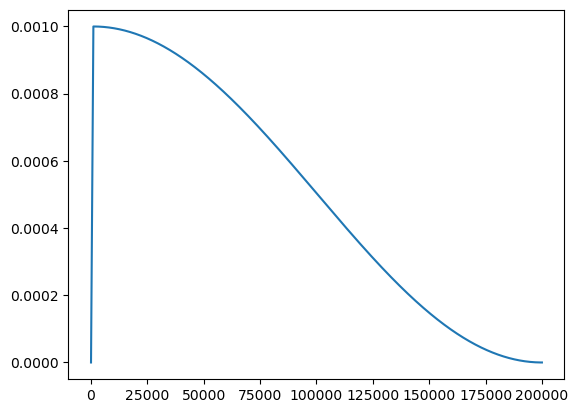

In [6]:
from cosine_annealing_warmup import CosineAnnealingWarmupRestarts
import matplotlib.pyplot as plt
import torch

model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

max_step = 200001
scheduler = CosineAnnealingWarmupRestarts(optimizer,
                                          first_cycle_steps=200000,
                                          cycle_mult=0.3,
                                          max_lr=0.001,
                                          min_lr=0,
                                          warmup_steps=1000,
                                          gamma=0.1)

lrs = []
for _ in range(max_step):
    lrs.append(scheduler.get_lr()[0])
    scheduler.step()
plt.plot(lrs)
print(lrs[-1])